# Digits recongnition neural network using mnist dataset


In [183]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

In [184]:
class NeuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
#         self.wih=np.random.rand(self.hnodes,self.inodes)-0.5
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
#         self.who=np.random.rand(self.onodes,self.hnodes)-0.5
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.activation_function=lambda x:sc.expit(x)
        pass
    def train(self,inputs_list,targets_list):
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        
        hidden_inputs=np.dot(self.wih.astype(float),inputs.astype(float))
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        outputs_errors=targets-final_outputs
        
        hidden_errors=np.dot(self.who.T,outputs_errors)
        
        self.who+=self.lr*np.dot((outputs_errors*final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot(((hidden_errors*hidden_outputs)*(1.0-hidden_outputs)),np.transpose(inputs))

        pass
    def query(self,inputs_list):
        inputs=np.array(inputs_list,ndmin=2).T
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

# other functions
def showImage(inputs):
    inputs=inputs.split(",")
    print("value is: "+inputs[0])
    image_matrix=np.asfarray(inputs[1:]).reshape(28,28)
    plt.imshow(image_matrix,cmap="Greys")

## Neural Network initialisation

In [185]:
input_nodes=784
hidden_nodes=200
output_nodes=10
learning_rate=0.1
n=NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

## Training phase

value is: 5


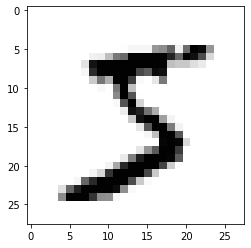

In [186]:
data_file=open("mnist-dataset/mnist_train.csv","r")
train_data=data_file.readlines()
data_file.close()
showImage(train_data[0])

In [187]:
for record in train_data:
    values=record.split(",")
    scaled_input=((np.asfarray(values[1:])/255 )*0.99) +0.01
    target=np.zeros(output_nodes)+0.01
    target[int(values[0])]=0.99
    n.train(scaled_input,target)
    pass

## Testing Phase

value is: 7


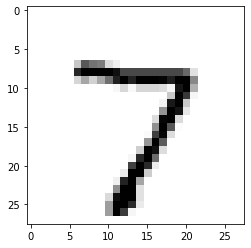

In [188]:
data_file2=open("mnist-dataset/mnist_test.csv")
test_data=data_file2.readlines()
data_file2.close()
showImage(test_data[0])

In [189]:
scoreboard=[]
for record in test_data:
    values=record.split(',')
    correct_answer=values[0]
    scaled_input=np.asfarray(values[1:])/255 * 0.99 +0.01
    result=n.query(scaled_input)
    predicted_answer=np.argmax(result)
    if(predicted_answer==int(correct_answer)):
        scoreboard.append(1)
    else:
        scoreboard.append(0)
    pass
print("accuracy: "+str(np.asarray(scoreboard).sum()/np.asarray(scoreboard).size*100 )+ "%")

accuracy: 95.91%


## Test it yourself

In [190]:
from PIL import ImageTk, Image, ImageDraw,ImageOps
import PIL.Image
from tkinter import *

In [193]:
width =200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back
def save():
    # save image to hard drive
    filename = "test.png"
    output_image.save(filename)
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

predicted digit is : 2


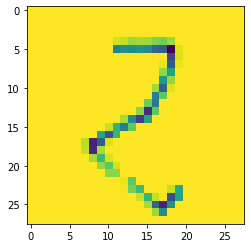

In [194]:
img=PIL.Image.open("test.png")
img=ImageOps.grayscale(img)
img = img.resize((28,28))
img=img.convert('L')
plt.imshow(img)
img=np.asfarray(img).reshape(784)
scaled_input2=(np.abs(255-img))/255 * 0.99 +0.01
result=n.query(scaled_input2)
predicted_answer=np.argmax(result)
print("predicted digit is : "+str(predicted_answer))